In [334]:
using Pkg
Pkg.activate(".")

  Activating project at `/data/gpfs/projects/punim0638/stephenz/QROT/notebooks/ex_dentate`


In [335]:
using NPZ
using OptimalTransport
using StatsBase
using LinearAlgebra
include("../../src/util.jl")

norm_kernel (generic function with 1 method)

In [336]:
X = npzread("X.npy")'
K_quad = kernel_ot_quad(X, 1.0);

In [337]:
using LogExpFunctions
perplexity(K) = map(x -> exp(sum(-xlogx.(x))), eachrow(K))
perp_quad = mean(perplexity(K_quad))

52.192199649197846

In [5]:
# simple bisection search to match perplexity
eps_ent_l, eps_ent_r = 0.0, 0.1
K_ent = similar(K_quad)
for _ = 1:10
    eps_ent = (eps_ent_l + eps_ent_r)/2
    K_ent .= kernel_ot_ent(X, eps_ent)
    perp_ent = mean(perplexity(K_ent))
    if perp_ent > perp_quad 
        eps_ent_r = eps_ent
    else
        eps_ent_l = eps_ent
    end
    @info "perp_ent = $(perp_ent), eps_ent = $(eps_ent)"
end

[ Info: perp_ent = 2278.884382109476, eps_ent = 0.05
[ Info: perp_ent = 1107.4273135278995, eps_ent = 0.025
[ Info: perp_ent = 227.3295386131119, eps_ent = 0.0125
[ Info: perp_ent = 22.47756511767715, eps_ent = 0.00625
[ Info: perp_ent = 86.65464436255158, eps_ent = 0.009375000000000001
[ Info: perp_ent = 46.336890300349474, eps_ent = 0.0078125
[ Info: perp_ent = 64.15612673215249, eps_ent = 0.00859375
[ Info: perp_ent = 54.69211703103639, eps_ent = 0.008203125
[ Info: perp_ent = 50.38026115975975, eps_ent = 0.0080078125
[ Info: perp_ent = 52.50206366983591, eps_ent = 0.00810546875


In [6]:
npzwrite("W_quad.npy", K_quad)
npzwrite("W_ent.npy", K_ent)

In [7]:
size(K_quad)

(5000, 5000)

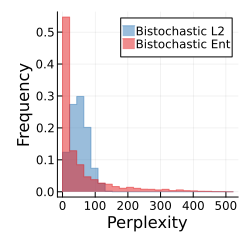

In [21]:
using Plots
using ColorSchemes
pal=palette(:Set1_9)
perp_quad = perplexity(K_quad)
perp_ent = perplexity(K_ent)
plt=stephist(perp_quad, weights = ones(size(K_quad, 1))/size(K_quad, 1), alpha = 0.5, bins = range(0, 10*mean(perp_quad), 25), label = "Bistochastic L2", fill = true, xlabel = "Perplexity", ylabel = "Frequency", size = (250, 250), color = pal[2])
stephist!(perp_ent, weights = ones(size(K_ent, 1))/size(K_ent, 1), alpha = 0.5, bins = range(0, 10*mean(perp_quad), 25), label = "Bistochastic Ent", fill = true, color = pal[1])
savefig(plt, "../../figures/scRNA_dentate_perplexity_freq.svg")
plt

In [29]:
eigs_quad = eigen(Hermitian(I - K_quad))
eigs_ent = eigen(Hermitian(I - K_ent));

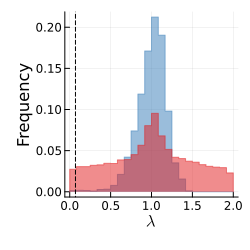

In [206]:
using LaTeXStrings
plt=stephist(eigs_quad.values, weights = ones(size(K_quad, 1))/size(K_quad, 1), bins = range(0, 2, 25), fill = true, color = pal[2], alpha = 0.5, size = (250, 250), label = "Bistochastic L2")
stephist!(eigs_ent.values, weights = ones(size(K_ent, 1))/size(K_ent, 1), bins = range(0, 2, 25), fill = true, color = pal[1], alpha = 0.5, label = "Bistochastic Ent", legend = nothing, xlabel = L"$\lambda$", ylabel = "Frequency")
vline!([t, ], linestyle = :dash, color = :black)
savefig(plt, "../figures/dentate_laplacian_spectrum.svg")
plt

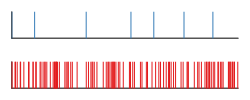

In [203]:
t = 0.07
plt1=vline(eigs_quad.values, xlim = (0, t), axis = nothing, color = pal[2], alpha = 1, legend = nothing, linewidth = 1)
plt2=vline(eigs_ent.values, xlim = (0, t), axis = nothing, color = pal[1], alpha = 1, legend = nothing, linewidth = 1)
plt=plot(plt1, plt2; layout = (2, 1), size = (250, 100))
savefig(plt, "../figures/dentate_laplacian_spectrum_zoom.svg")
plt

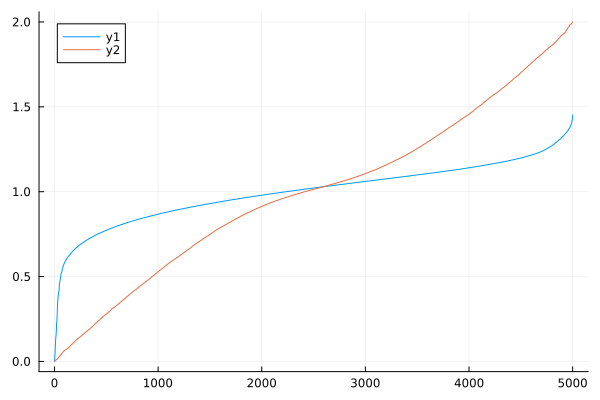

In [204]:
plot(eigs_quad.values)
plot!(eigs_ent.values)

In [ ]:
npzwrite("U_quad.npy", eigs_quad.vectors)
npzwrite("U_ent.npy", eigs_ent.vectors)

In [352]:
X = npzread("X_batch.npy")';

In [353]:
eps_quad_l, eps_quad_r = 0.5, 5.0
K_quad = nothing
u_quad = nothing
perp = 50.
eps_quad = 0.
for _ = 1:10
    eps_quad = (eps_quad_l + eps_quad_r)/2
    K_quad, u_quad = kernel_ot_quad(X, eps_quad, potentials=true)
    perp_quad = mean(perplexity(K_quad))
    if perp_quad > perp
        eps_quad_r = eps_quad
    else
        eps_quad_l = eps_quad
    end
    @info "perp_quad = $(perp_quad), eps_quad = $(eps_quad)"
end
npzwrite("W_quad_batch.npy", K_quad)
npzwrite("u_quad_batch.npy", u_quad)

[ Info: perp_quad = 89.5236177706405, eps_quad = 2.75
[ Info: perp_quad = 55.60162911237605, eps_quad = 1.625
[ Info: perp_quad = 38.065898671587505, eps_quad = 1.0625
[ Info: perp_quad = 46.909623472590184, eps_quad = 1.34375
[ Info: perp_quad = 51.26257566567557, eps_quad = 1.484375
[ Info: perp_quad = 49.088928250894746, eps_quad = 1.4140625
[ Info: perp_quad = 50.17742403578951, eps_quad = 1.44921875
[ Info: perp_quad = 49.6327645763711, eps_quad = 1.431640625
[ Info: perp_quad = 49.905284220960645, eps_quad = 1.4404296875
[ Info: perp_quad = 50.041437102839616, eps_quad = 1.44482421875


In [354]:
eps_ent_l, eps_ent_r = 0.0, 0.1
K_ent = nothing
u_ent = nothing
eps_ent = 0.
for _ = 1:10
    eps_ent = (eps_ent_l + eps_ent_r)/2
    K_ent, u_ent = kernel_ot_ent(X, eps_ent, potentials=true)
    perp_ent = mean(perplexity(K_ent))
    if perp_ent > perp
        eps_ent_r = eps_ent
    else
        eps_ent_l = eps_ent
    end
    @info "perp_ent = $(perp_ent), eps_ent = $(eps_ent)"
end

[ Info: perp_ent = 1493.1114138761732, eps_ent = 0.05
[ Info: perp_ent = 467.1339553288333, eps_ent = 0.025
[ Info: perp_ent = 26.015782981385954, eps_ent = 0.0125
[ Info: perp_ent = 158.0150126171377, eps_ent = 0.018750000000000003
[ Info: perp_ent = 69.54997570271959, eps_ent = 0.015625
[ Info: perp_ent = 43.13569426269527, eps_ent = 0.0140625
[ Info: perp_ent = 55.02816379244043, eps_ent = 0.01484375
[ Info: perp_ent = 48.77119957027398, eps_ent = 0.014453125
[ Info: perp_ent = 51.81965540990254, eps_ent = 0.0146484375
[ Info: perp_ent = 50.27570842470584, eps_ent = 0.01455078125


In [355]:
npzwrite("W_ent_batch.npy", K_ent)
npzwrite("u_ent_batch.npy", u_ent)

In [356]:
eigs_quad = eigen(Hermitian(I-K_quad))
npzwrite("U_quad_batch.npy", eigs_quad.vectors)
eigs_ent = eigen(Hermitian(I-K_ent))
npzwrite("U_ent_batch.npy", eigs_ent.vectors)

In [357]:
K_gauss = form_kernel(X, eps_ent); K_gauss[diagind(K_gauss)] .= 0
K_gauss = norm_kernel(K_gauss, :sym)
npzwrite("W_gauss_batch.npy", K_gauss)

In [358]:
using NNlib
K_epanech = kernel_epanech(X, eps_quad); K_epanech[diagind(K_epanech)] .= 1e-6
K_epanech = norm_kernel(K_epanech, :sym)
npzwrite("W_epanech_batch.npy", K_epanech)